## Transmission Detection

We want to determine whether a signal contains a transmission sound in new observations. Based on our previous experiment and work, we have built models for the distribution of the transmission and background sounds. We would like to test if we obtain a new sample if it is from one of the two distributions. We can define the null hypothesis to be that the observation is from the background distribution, while the alternative that it is from the transmission distribution.

$\mathcal{H_0}: X \sim background $
 
$\mathcal{H_1}: X \sim transmission $

We can rewrite this is terms of the parameters of the skew-normal distributions that you have obtained from the fitting exercise.


$\mathcal{H_0}: X \sim skew\mathcal{N}(\alpha_{tr}, scale_{tr}, loc_{tr})$
 
$\mathcal{H_1}: X \sim skew\mathcal{N}(\alpha_{bg}, scale_{bg}, loc_{bg})$


In [49]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
from scipy import stats

In [50]:
# reading transmission dataset
df_tr = pd.read_csv("df_tr_test_sorted.csv")
# reading background dataset
df_bg = pd.read_csv("df_bg_test_sorted.csv")

In [51]:
df_tr.head()

,220730035432,220730105431,220730083931,220730090632,220729195433,220730074532,220730060031,220729205733,220729184515,220729195733,...,220730113331,220730040332,220729193616,220729235732,220730031533,220730101532,220730101831,220730140331,220730084531,220729225518
0,1.394394e+06,1.978944e+06,389699.670892,3.434228e+06,4.237984e+06,864646.144792,3.884819e+06,3.361160e+06,2.368643e+06,-505391.760689,...,4.737287e+06,1.388305e+06,7.221622e+06,5.614111e+06,1.181277e+06,3.373338e+06,5.224411e+06,-1.339593e+06,3.318536e+06,-1.910746e+07
1,1.412661e+06,1.997211e+06,365343.441462,3.422050e+06,4.171004e+06,876824.259508,3.860462e+06,3.440317e+06,2.405178e+06,-535837.047477,...,4.731198e+06,1.382216e+06,7.209444e+06,5.614111e+06,1.132565e+06,3.324625e+06,5.242678e+06,-1.345682e+06,3.342892e+06,-2.199976e+07
2,1.412661e+06,2.045923e+06,365343.441462,3.415961e+06,4.158826e+06,870735.202150,3.830017e+06,3.403783e+06,2.399089e+06,-529747.990119,...,4.779910e+06,1.418750e+06,7.203355e+06,5.656734e+06,1.132565e+06,3.257646e+06,5.193966e+06,-1.370038e+06,3.318536e+06,-2.320540e+07
3,1.394394e+06,2.070280e+06,322720.039958,3.446406e+06,4.152737e+06,870735.202150,3.811750e+06,3.385516e+06,2.356465e+06,-541926.104835,...,4.804266e+06,1.418750e+06,7.227711e+06,5.693269e+06,1.175188e+06,3.288091e+06,5.224411e+06,-1.382216e+06,3.324625e+06,-2.194496e+07
4,1.382216e+06,2.100725e+06,292274.753169,3.446406e+06,4.104025e+06,889002.374223,3.799572e+06,3.434228e+06,2.368643e+06,-560193.276908,...,4.773821e+06,1.430928e+06,7.245978e+06,5.723714e+06,1.193455e+06,3.355071e+06,5.273124e+06,-1.376127e+06,3.330714e+06,-2.091591e+07


In [52]:
# Y = df_bg.iloc[:,-10:]

In [53]:
def BandPass(inputSignal, bandLimits, freqSample):
    sos = sp.signal.butter(4, bandLimits, 'bandpass', fs = freqSample, output='sos')
    outputSignal = sp.signal.sosfilt(sos,inputSignal)
    
    return outputSignal

In [54]:
flimits = [3450, 3550]

In [55]:
fs = 48000

In [56]:
bg_all, tr_all = [], []

for col in df_bg:

    bg_ch4_filt = BandPass(df_bg[col], flimits, fs)
    bg_all.append(20*np.log10(np.sqrt(np.mean(np.square(bg_ch4_filt.astype('float'))))))


for col in df_tr:

    tr_ch4_filt = BandPass(df_tr[col], flimits, fs)
    tr_all.append(20*np.log10(np.sqrt(np.mean(np.square(tr_ch4_filt.astype('float'))))))

In [57]:
len(bg_all)

400

In [168]:
Y = bg_all[-10:-1]
print(Y)

[np.float64(85.40472163621118), np.float64(85.82512280521672), np.float64(86.49939305454399), np.float64(86.74040471951949), np.float64(86.7620369025837), np.float64(87.52542832359526), np.float64(88.41010762535193), np.float64(88.97417831348366), np.float64(91.75624334498723)]


We will follow the following procedure:

1. Set a significance level
2. Calculate the test statistic
3. Determine the critical region based on alpha and the test statistic
4. Make decision

**1. Significance level $\alpha = 0.001$**

In [169]:
alpha = 0.001

**2. Likelihood-ratio test statistic**


**TODO:** Evaluate the test statistic at the observed sample

$$\Lambda(X) = \frac{\mathcal{L(\theta_0|X)}}{\mathcal{L(\theta_1|X)}}$$

Hint: you can use the `evaluateLogL_ratio` function from the `primers/stats_05_statistical_testing.ipynb`


In [170]:
import scipy.stats as stats

In [171]:
# set parameters for null distribution (background)

In [172]:
loc_0 = 66.6
scale_0 = 6.3
a_0 = 3.7

In [173]:
# set parameters for alternative distribution (transmission)

In [174]:
loc_1 = 72.4
scale_1 = 5.2
a_1 = 0

In [175]:
null_likelihood = stats.skewnorm.pdf(Y, a=a_0, loc=loc_0, scale=scale_0)
alternative_likelihood = stats.skewnorm.pdf(Y, a=a_1, loc=loc_1, scale=scale_1)

In [176]:
logL_ratio = np.sum(np.log(null_likelihood)) - np.sum(np.log(alternative_likelihood))
print(logL_ratio)

-6.876147445474395


In [177]:
# set the value of the test statistic
T = logL_ratio

**3. Identify critical region**

**TODO** Determine the critical region for which to reject the null hypothesis, i.e. find $c$ for which $P(\Lambda(X)\le c) = 0.001$ under the null distribution.

1. Generate a large sample of samples of the size of the observed sample, and evaluate for each of them the likelihood ratio. You will obtain the empirical distribution of $\Lambda (X)$
2. Find the $\alpha\times 100$ th percentile of that distribution.
3. Determine if the test statistic is less than $c$. What is your conclusion?

In [178]:
def evaluateLogL_ratio(x):
  null_likelihood = stats.skewnorm.pdf(x, a=a_0, loc=loc_0, scale=scale_0)
  alternative_likelihood = stats.skewnorm.pdf(x, a=a_1, loc=loc_1, scale=scale_1)
  logL_ratio = np.sum(np.log(null_likelihood)) - np.sum(np.log(alternative_likelihood))
  return(logL_ratio)


In [179]:
Y

[np.float64(85.40472163621118),
 np.float64(85.82512280521672),
 np.float64(86.49939305454399),
 np.float64(86.74040471951949),
 np.float64(86.7620369025837),
 np.float64(87.52542832359526),
 np.float64(88.41010762535193),
 np.float64(88.97417831348366),
 np.float64(91.75624334498723)]

Text(0.5, 1.0, 'observed sample vs sample from the null')

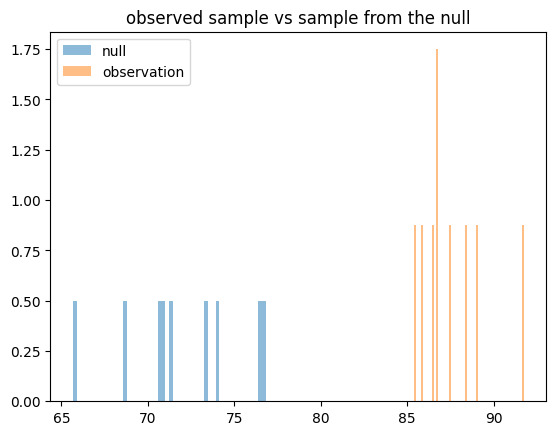

In [180]:
_ = plt.hist(stats.skewnorm.rvs(loc=loc_0, scale=scale_0, a=a_0, size=len(Y)),bins=50, alpha=0.5, density=True, label="null")
_ = plt.hist(Y, bins=50, alpha=0.5, density=True, label="observation")
plt.legend()
plt.title("observed sample vs sample from the null")

In [181]:
# generate sample from the null distribution and evaluate the loglikelihood ratio at each sample point 
test_stat_sample_null = [evaluateLogL_ratio(stats.skewnorm.rvs(loc=loc_0, scale=scale_0, a=a_0, size=len(Y))) for i in range(10000)]

In [182]:
# evaluate the desired percentile from the sample
c = np.percentile(test_stat_sample_null, alpha*100)
print(c)

-4.088177526126597


In [183]:
# p-value
percentile = stats.percentileofscore(test_stat_sample_null, T, kind='rank')
print(percentile/100)

0.0


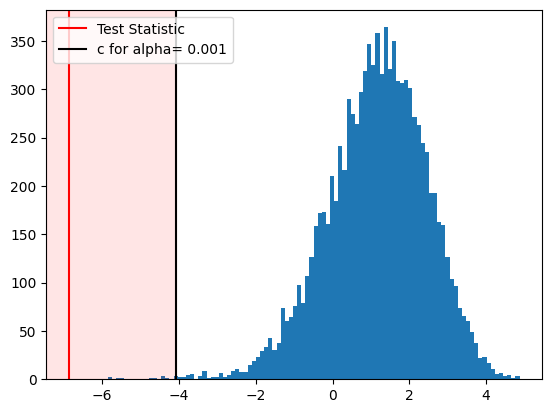

In [184]:
import matplotlib.pyplot as plt

# plot the distribution of the test statisticunder null
out = plt.hist(test_stat_sample_null, bins=100)
plt.axvline(T, color="r", label="Test Statistic")
plt.axvline(c, color="k", label=f"c for alpha= {alpha:.3f}")
(left, right) = plt.xlim()
plt.axvspan(left, c, alpha=0.1, color='red')
plt.xlim(left, right)
plt.legend()

What is the conclusion?

* If we pick values at the upper end of the background, there is a higher chance they can be in the lower tail of the transmission distribution. The result is we reject the null hypothesis and we make Type II error mistakes.

* If we pick values at the lower end of the transmission, there is a higher chance they can be in the upper tail of the background distribution. The result is we cannot reject the null and we make Type I error mistakes.